# Gradiente Descent in Python

## Loss Function: Mean Squared Error

In the context of linear regression, we try to find a line that best fits the data — that is, our predictions $\hat{y}_i$ will be given by a line. When describing a line, we use the formula $y = wx + b$ , 

where **y** is the predicted value (the value y at any point x),

 **w** represents the weight (how much the value of x affects y) and
 
  **b** represents the bias (or how many points we move the line up or down the grid).

This time, because it's a two-variable function, we will use partial derivatives to help our algorithm find the best fit line (or global minima for **MSE**). In other words, we will find the minimum of the **MSE** function given, for all real numbers **w** and **b**:

$\text{MSE}(w, b) = \dfrac{1}{n}\sum\limits_{i=1}^{n}\left(y_i - (wx_i + b)\right)^2$

The bigger the **MSE**, the farther away the line is from the best fit. And the closer the **MSE** value is from 0, the closer it is to the best fit — or, in other words, the closer it is to the global minimum.

In [33]:
def mean_squared_error(y_true, y_predicted):
    cost = sum((y_true-y_predicted)**2) / len(y_true)
    return cost

#y_true and y_predicted are Series in pandas

## Partial Derivatives

We can now calculate the mean squared error of a line — our cost. But what happens once you have the cost of a given **line**? How do we take a step down the gradient?

The partial derivative is a mathematical way to calculate the slope of a gradient at a particular point. This is what allows our algorithm to understand which way is down and which way is up — in other words, the partial derivative helps us see the next possible step so we can continue going down toward the global minimum.

Since we need to update both the **weight** and the **bias** to create a new line, we need to calculate the derivative for each of them.

The weight partial derivative is the average of the weight multiplied by the difference between the predicted value and the actual value. 

In other words, we update the weight by multiplying it by our average error.

Thus the **weight partial derivative** is given by:


$\dfrac{\partial \text{MSE}}{\partial w}(w,b) = -\dfrac{2}{n}\sum\limits_{i=1}^{n}x_i\left(y_i - (wx_i + b)\right)$

And the **bias partial derivative** is given by:

$\dfrac{\partial \text{MSE}}{\partial b}(w,b) = -\dfrac{2}{n}\sum\limits_{i=1}^{n}\left(y_i - (wx_i + b)\right)$


In [1]:
import pandas as pd

y = pd.Series(data=[1,2,3,4,5,6,7,8,9])
x = pd.Series(data=[1, 0, 6, 7, 6, 8, 8, 1, 9])
w = 0.7
b = 0.5
#y_predicted = w*x + b
y_predicted = 0.7*x + 0.5
n = len(y_predicted)

weight_derivative = (-2/n)* sum(x*(y-y_predicted))

bias_derivative = (-2/n)* sum((y-y_predicted))

## Initializing de weights

Let's look at the variables we'll use to implement gradient descent:

`current_weight` — we need to start with a base weight so we can create our first line. As we mentioned before, we want this one to be close to 0 but not at 0. As the algorithm moves through each iteration, this variable will change by means of the weight partial derivative.

`current_bias` — we need to start off the bias as well. Once again, we want to start with a positive number very close to 0. Like the previous one, this will change.

`learning_rate` — the learning rate will define how quickly the algorithm will move toward the minimum. Just remember that the larger the rate, the bigger the chance it will never reach the minimum (never converge). Since this variable doesn't change, we don't need to initialize it.

`iterations` — how many times we want the algorithm to iterate to try and find the minimum. This one doesn't change once the function is called, so there's no need to initialize it.

`stopping_threshold` — the very small number that will tell the algorithm to stop if the cost function isn't improving by at least this much from one iteration to the next. Again, this one doesn't need to be initialized.

`n` — the variable that will contain the number of items in the array. This one is important since we will be using it in many of the formulas inside the function. We initialize it by assigning the length of x to it using the len() function.

`costs` — we want to keep track of the cost in every iteration. this will allow us to visualize it later. We initialize it by assigning an empty list to it. This isn't necessary for the algorithm to run, but it can be useful to visualize how it's running.

`weights` — as with cost, we want to keep track of the change in weights. We also initialize it with an empty list. As with costs, this isn't necessary for the algorithm to run, but it can be useful.

`previous_cost` — finally, we need to be able to compare the current cost value with the previous cost value. For that we need this variable. Since there is no previous cost value when we initialize the function, we set the starting value of this one to None.

        def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, tolerance = 1e-4,current_weight=0.1,current_bias=0.01):   
            n = float(len(x))
            costs = []
            weights = []
            previous_cost = 0

## Step by Step

1. To begin, we need to create a loop based on the number of iterations we set up. We can do this using range on the number of iterations.
1. Determine how far our base prediction (`current_weight` and `current_bias`)
    *  We need to create our predictions by multiplying `x` times the `current_weight` and adding the `current_bias`. $y = (wx_i + b)$
    * We need to calculate our current cost using our `mean_squared_error`() function from before. $\text{MSE}(w, b) = \dfrac{1}{n}\sum\limits_{i=1}^{n}\left(y_i - ypred)\right)^2$
1. Check if the difference between our `previous_cost` and our `current_cost` is larger than our `stoping_criterion`. If it is, we **continue** — if not, we need to stop our function to prevent wasting more time and computing power.
1.  We had already set up a `previous_cost` variable, and we initialized it to None, so now we have to update it with the value we obtained for `current_cost`. This will allow us to keep checking our stoping_criterion on each iteration. `previous_cost` = `current_cost`
1. Append both the `current_cost` to the costs list and the `current_weight` to the weights list.
1. Calculate our derivatives from `weight` and `bias` - **formulas above**
     * These derivatives will allow us to change our weight and bias values, so we can draw a new line and run new predictions, taking steps closer and closer to the best fit line.
1. Update our `weight` and `bias`. 
    * Subtract the `weight_derivative` times the learning_rate from our current_weight value. This becomes our new `current_weight`. **current_weight = w_derivative -lr*current_weight**
    * Subtract the `bias_derivative` times the learning_rate from our current_bias. This becomes our new `current_bias`. **current_bias = b_derivative -lr*current_bias**
1. print each iteration:
``print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")``

In [29]:
def gradient_descent(x, y,
                     iterations = 1000, learning_rate = 0.0001, tolerance = 1e-4,
                     current_weight = 0.1, current_bias = 0.01):
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
    
    for i in range(iterations):
        
        y_predicted = (current_weight * x) + current_bias
        current_cost = mean_squared_error(y, y_predicted)
        
        if previous_cost and abs(previous_cost-current_cost) < tolerance:
            break
        
        previous_cost = current_cost
        
        costs.append(current_cost)
        weights.append(current_weight)
        
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
        
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
        
    print(f"Iteration {i+1}: Cost {current_cost}")
        
    return current_weight, current_bias

# Visualizing the Function: Plotting Cost vs. Weight

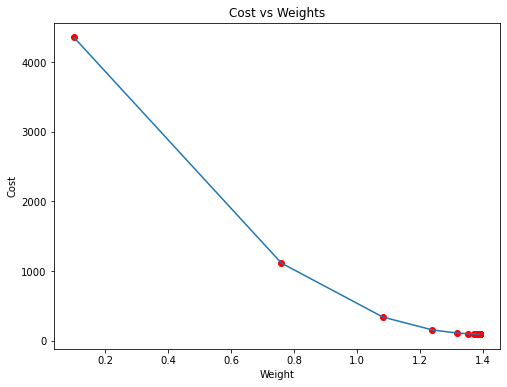

        plt.figure(figsize = (8,6))
        plt.plot(weights, costs)
        plt.scatter(weights, costs, marker='o', color='red')
        plt.title("Cost vs Weights")
        plt.ylabel("Cost")
        plt.xlabel("Weight")
        plt.show()

Iteration 1: Cost 4352.088931274408


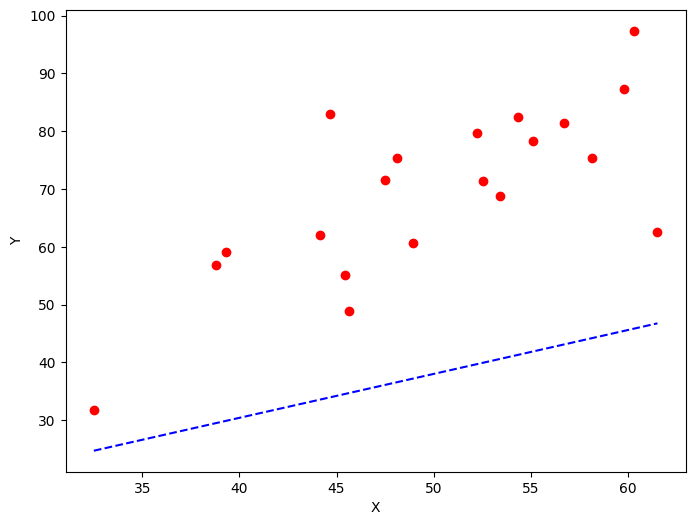

Iteration 2: Cost 1114.856147435002


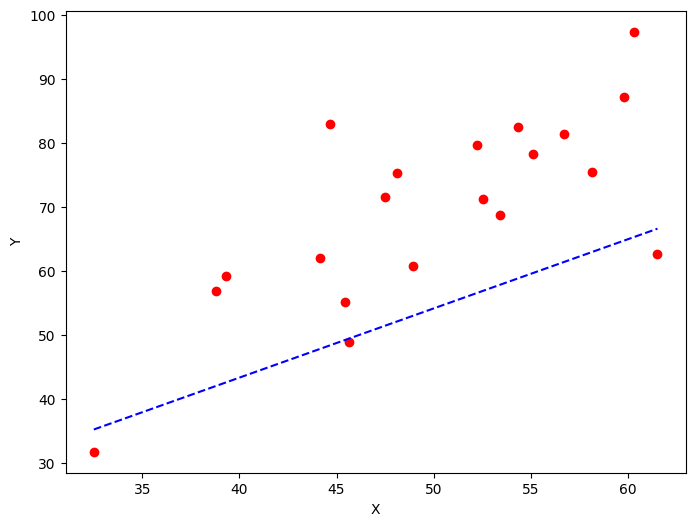

Iteration 3: Cost 341.42912086804455


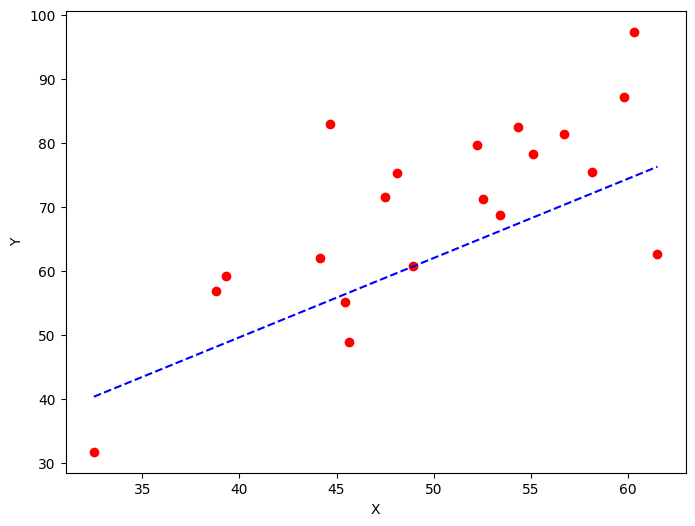

Iteration 4: Cost 156.64495290904443


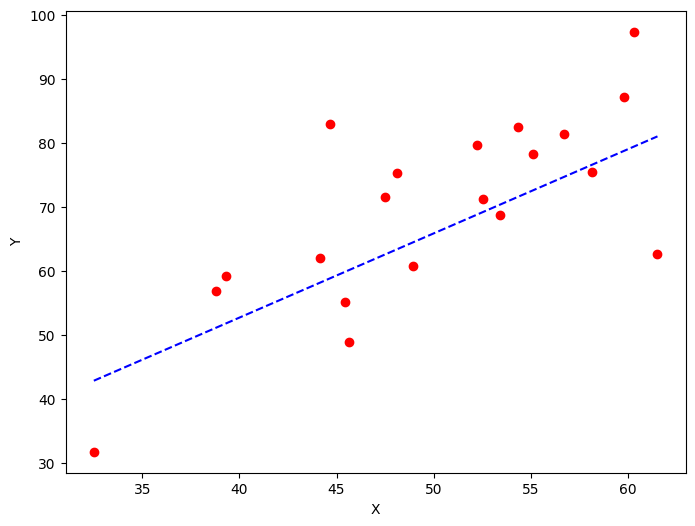

Iteration 5: Cost 112.49704004742098


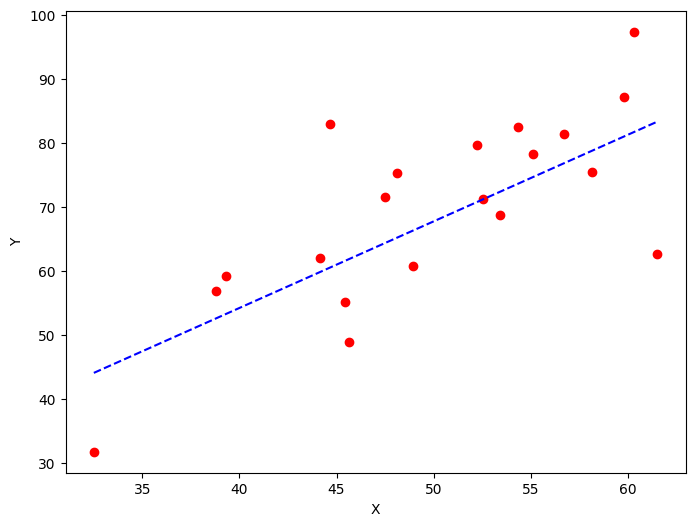

Iteration 6: Cost 101.94939253954558


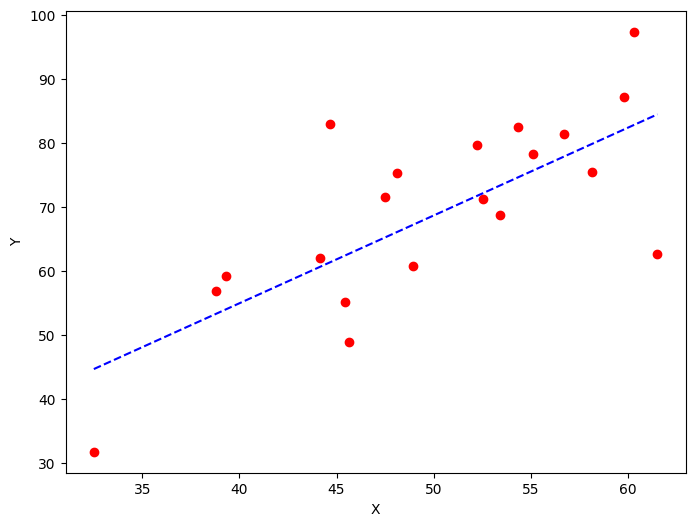

Iteration 7: Cost 99.4293893333546


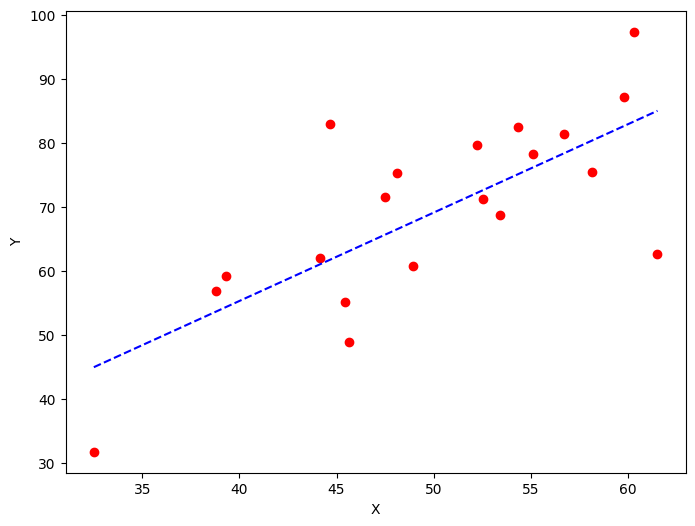

Iteration 8: Cost 98.82731958262897


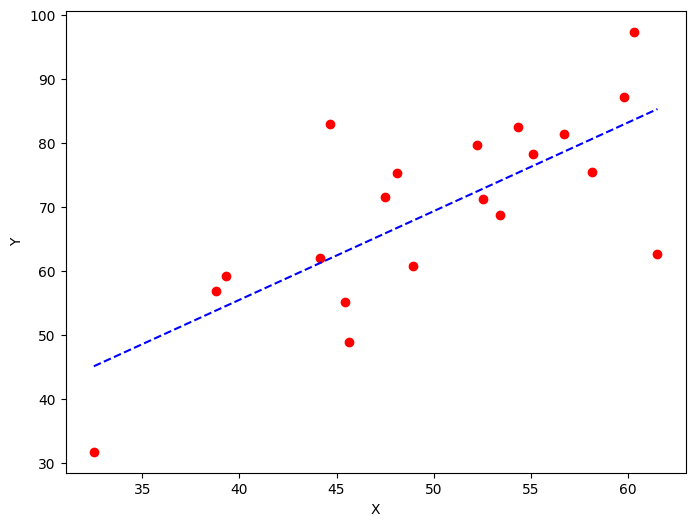

Iteration 9: Cost 98.68347500997263


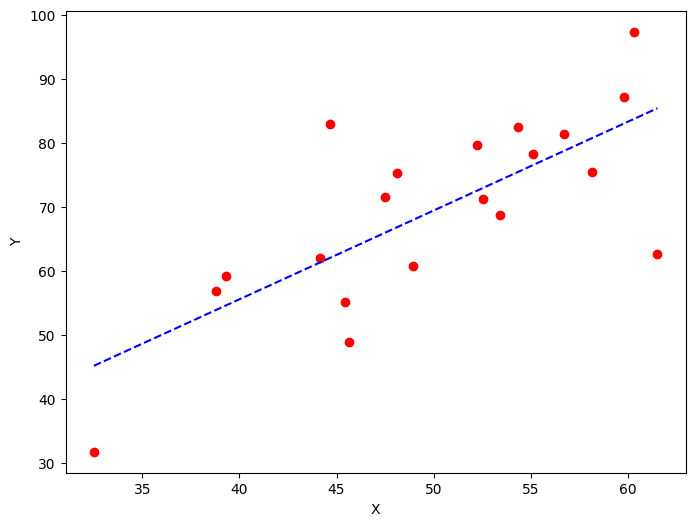

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(data=[32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787, 55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])

y = pd.Series(data=[31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513, 78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989, 55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])


def plot_gd(X,Y, iterations):
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations)
    Y_pred = estimated_weight*X + estimated_bias
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot(
        [min(X), max(X)],
        [min(Y_pred), max(Y_pred)],
        color='blue', markerfacecolor='red',
        markersize=10,linestyle='dashed'
    )
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    
    return
    
for i in range(1,10):
    plot_gd(x,y,i)